<a href="https://colab.research.google.com/github/jpabonl/Metodos_numericos/blob/main/Potencial_MDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Calculo del potencial electrico por el metodo de diferencias finitas***

Considere una región espacial en dos dimensiones que consiste de un cuadrado con lados de
longitud 10 cm. 3 de los lados se encuentran aterrizados, como indica la figura, el cuarto lado se encuentra aislado de los otros tres y es conectado a una batería de 5 Voltios.

*   Encuentre el potencial eléctrico dentro del cuadrado usando el método de diferencias finitas,
considerando una grilla de celdas cuadradas de 0.1 cm de lado. Haga una gráfica donde se indique
con diferentes colores como cambia el potencial eléctrico dentro de la caja como una función de
las coordenadas x e y.


> 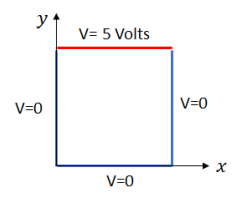




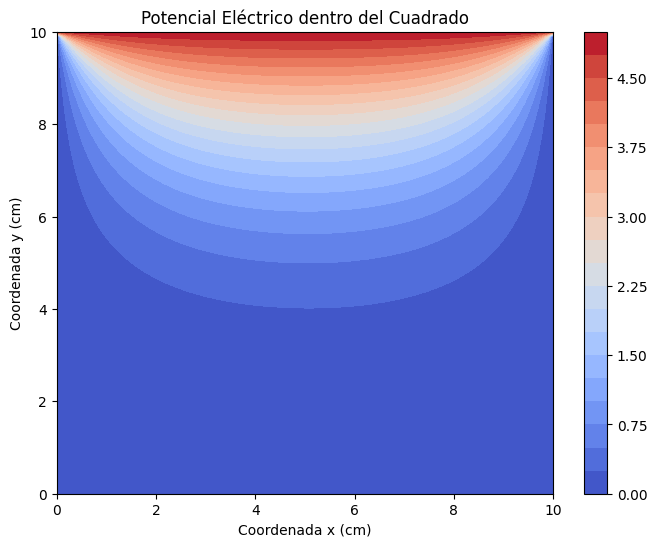

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
size = 10.0  # Tamaño del cuadrado en cm
grid_size = 100  # Número de puntos en cada dirección
dx = size / (grid_size - 1)  # Tamaño de paso
max_iterations = 1000  # Número máximo de iteraciones
tolerance = 1e-4  # Tolerancia para la convergencia

# Inicializar la cuadrícula
grid = np.zeros((grid_size, grid_size))

# Establecer condiciones de contorno
# Potencial igual a 5 en el borde superior
grid[:, 0] = 0  # Borde izquierdo
grid[:, -1] = 0  # Borde derecho
grid[0, :] = 0  # Borde superior
grid[-1, :] = 5  # Borde inferior

# Iterar para resolver la ecuación de Laplace
for _ in range(max_iterations):
    previous_grid = grid.copy()
    for i in range(1, grid_size - 1):
        for j in range(1, grid_size - 1):
            grid[i, j] = 0.25 * (grid[i + 1, j] + grid[i - 1, j] + grid[i, j + 1] + grid[i, j - 1])

    # Verificar convergencia
    if np.allclose(grid, previous_grid, atol=tolerance):
        break

# Graficar los resultados
x = np.linspace(0, size, grid_size)
y = np.linspace(0, size, grid_size)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, grid, cmap='coolwarm', levels=20)
plt.colorbar()
plt.xlabel('Coordenada x (cm)')
plt.ylabel('Coordenada y (cm)')
plt.title('Potencial Eléctrico dentro del Cuadrado')
plt.show()
